# Preprocessed data sanity check

In [1]:
# Set notebook root to project root
from helper_functions import set_project_root

set_project_root()

# Standard library imports
from pathlib import Path

# Third party imports
import h5py
import matplotlib.pyplot as plt
import numpy as np

# Local imports
from ariel_data_preprocessing.utils import load_masked_frames
import configuration as config

# Make sure the figures directory exists
figures_dir = f'{config.FIGURES_DIRECTORY}/signal_extraction'
Path(figures_dir).mkdir(parents=True, exist_ok=True)

Working directory: /mnt/arkk/kaggle/ariel-data-challenge


## 1. Load corrected/extracted data for a sample planet

In [2]:
# Load corrected/extracted data for a sample planet
with h5py.File(f'{config.PROCESSED_DATA_DIRECTORY}/train.h5', 'r') as hdf:
    signal, planet_id = load_masked_frames(hdf, planet='random', return_id=True)

## 2. Plot complete spectrogram

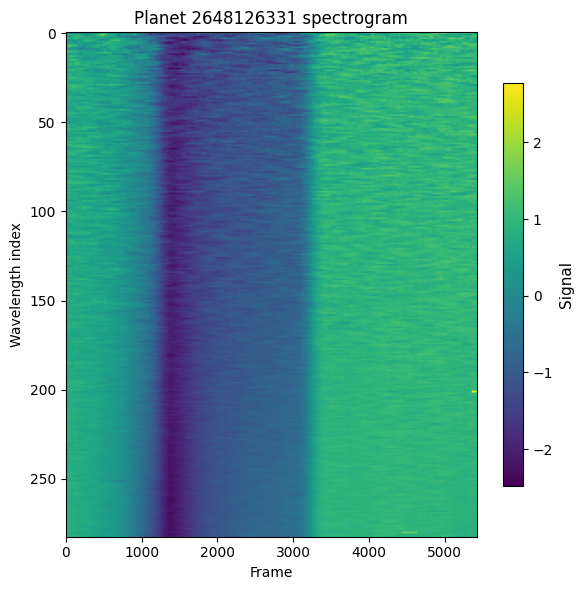

In [3]:
plt.figure(figsize=(config.STD_FIG_WIDTH, config.STD_FIG_WIDTH))
plt.title(f'Planet {planet_id} spectrogram')
plt.xlabel('Frame')
plt.ylabel('Wavelength index')

im = plt.imshow(np.transpose(signal), aspect='auto', cmap='viridis')
cbar = plt.colorbar(im, shrink=0.8)
cbar.set_label('Signal', fontsize=11)

plt.tight_layout()
plt.savefig(
    f'{figures_dir}/02.6-spectrograms.jpg',
    dpi=config.STD_FIG_DPI,
    bbox_inches='tight'
)

## 3. Check wavelength values

In [4]:
print(f'FGS1 signal, frame 1: {signal[0, 0]}')
print(f'AIRS-CH0 signal, first three wavelengths: {signal[0, 1:4]}')
print(f'AIRS-CH0 signal, last three wavelengths: {signal[0, -3:]}')

FGS1 signal, frame 1: 0.3313853434058913
AIRS-CH0 signal, first three wavelengths: [0.7418959654085527 0.5546681876285342 1.474020110721079]
AIRS-CH0 signal, last three wavelengths: [0.7056450638787433 0.8961207310310586 0.8911836732981785]


Raw FGS1 signal at wavelength index 0 is higher than the AIRS-CH0 signal signals because the FGS1 signal is aggregated over more pixels. This tells us we combined the two in the right order.